In [1]:
import healpy as hp
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_scheduler.skybrightness_pre import dark_m5
from rubin_scheduler.scheduler.model_observatory import ModelObservatory
from rubin_scheduler.utils import ra_dec2_hpid

In [2]:
nside = 32

In [3]:
f1 = "greedy_only_v4.3.1_0yrs.db"
con = sqlite3.connect(f1)
sql = "select * from observations where night < 1;"
greedy_only = pd.read_sql(sql, con)
con.close()


f1 = "greedy_dodge_v4.3.1_0yrs.db"
con = sqlite3.connect(f1)
sql = "select * from observations where night < 1;"
greedy_dodge = pd.read_sql(sql, con)
con.close()


In [4]:
mo = ModelObservatory()
conditions = mo.return_conditions()
fiducial_FWHMEff = 0.7
dark_map = dark_m5(conditions.dec, "r", conditions.site.latitude_rad, fiducial_FWHMEff
            )

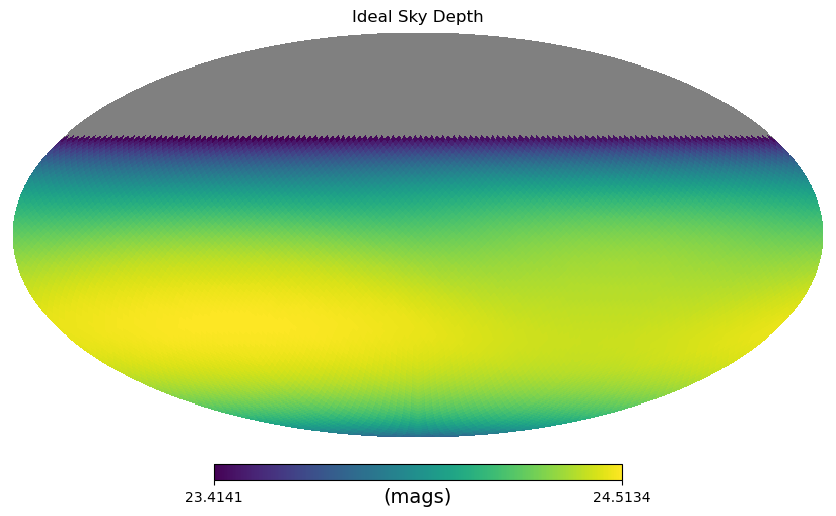

In [11]:
hp.mollview(dark_map, unit="(mags)", title="Ideal Sky Depth")

In [6]:
indx = ra_dec2_hpid(nside, greedy_only["fieldRA"], greedy_only["fieldDec"])
greedy_only["m5ideal"] = dark_map[indx]

indx = ra_dec2_hpid(nside, greedy_dodge["fieldRA"], greedy_dodge["fieldDec"])
greedy_dodge["m5ideal"] = dark_map[indx]


Text(0.5, 0, '5-sigma - Ideal 5-sigma (mags)')

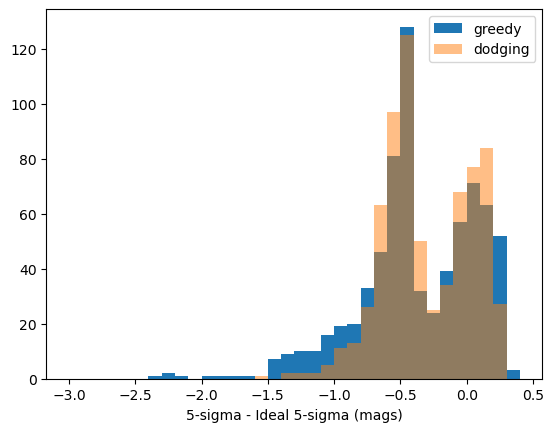

In [16]:
bins = np.arange(-3., 0.5, 0.1)
_temp = plt.hist(greedy_only["fiveSigmaDepth"] - greedy_only["m5ideal"] , bins=bins, label="greedy")
_temp = plt.hist(greedy_dodge["fiveSigmaDepth"] - greedy_dodge["m5ideal"], alpha=0.5, bins=bins, label="dodging")
plt.legend()
plt.xlabel("5-sigma - Ideal 5-sigma (mags)")

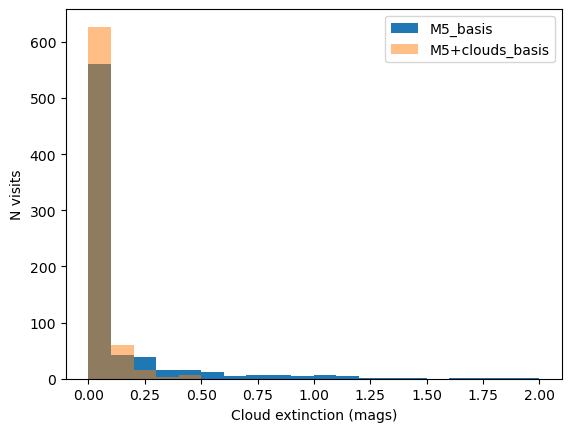

In [22]:
bins = np.arange(0, 2.1, 0.1)
_temp = plt.hist(greedy_only["cloud_extinction"], bins=bins, label="M5_basis")
_temp = plt.hist(greedy_dodge["cloud_extinction"], bins=bins, alpha=0.5, label="M5+clouds_basis")
plt.xlabel("Cloud extinction (mags)")
plt.ylabel("N visits")
plt.legend()

In [9]:
greedy_dodge["cloud_extinction"]

0      0.014803
1      0.002643
2      0.014270
3      0.016614
4      0.008953
         ...   
707    0.000000
708    0.000000
709    0.000000
710    0.000000
711    0.000000
Name: cloud_extinction, Length: 712, dtype: float64